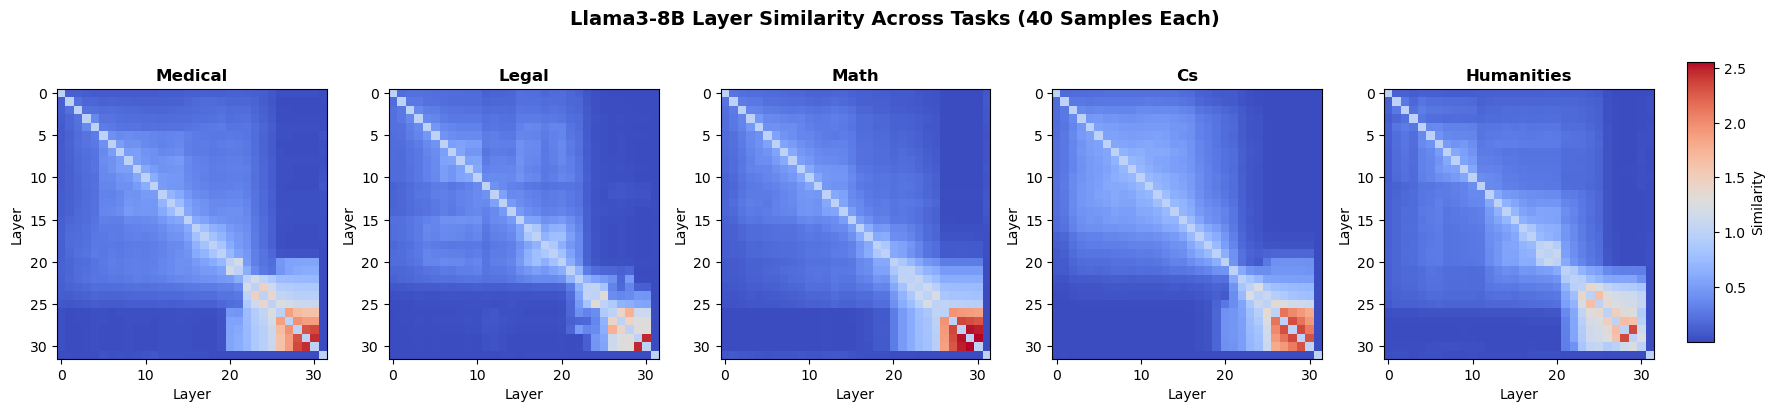

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

base = os.path.join("..", "outputs", "mmlu")
tasks = ["medical", "legal", "math", "cs", "humanities"]

# load all matrices
mats = [np.load(os.path.join(base, f"similarity_{t}_40s.npy")) for t in tasks]

# global min/max
vmin = min(m.min() for m in mats)
vmax = max(m.max() for m in mats)

fig, axes = plt.subplots(1, len(tasks), figsize=(18, 4))

for ax, task, sim in zip(axes, tasks, mats):
    im = ax.imshow(sim, cmap="coolwarm", interpolation="nearest",
                   vmin=vmin, vmax=vmax)
    ax.set_title(task.capitalize(), fontsize=12, fontweight="bold")
    ax.set_xlabel("Layer")
    ax.set_ylabel("Layer")

fig.suptitle("Llama3-8B Layer Similarity Across Tasks (40 Samples Each)",
             fontsize=14, fontweight="bold")

# leave space on the right for colorbar
plt.tight_layout(rect=[0, 0, 0.93, 0.95])

# dedicated axis for colorbar on the right
cbar_ax = fig.add_axes([0.94, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label="Similarity")

plt.show()


In [5]:
import numpy as np
import pandas as pd

n = len(tasks)
pair_sims = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        a = mats[i].ravel()
        b = mats[j].ravel()
        pair_sims[i, j] = np.corrcoef(a, b)[0, 1]

sim_df = pd.DataFrame(pair_sims, index=tasks, columns=tasks)
sim_df


,medical,legal,math,cs,humanities
medical,1.000000,0.887484,0.966250,0.940329,0.931864
legal,0.887484,1.000000,0.884862,0.899014,0.862810
math,0.966250,0.884862,1.000000,0.951172,0.903280
cs,0.940329,0.899014,0.951172,1.000000,0.885816
humanities,0.931864,0.862810,0.903280,0.885816,1.000000
